# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

<font color=darkblue> 
**Answer:** <br><br>
The proposed student intervention system is based on a **classification** problem, because the output space is discrete (categorical, finite). In this case, the output is binary: whether or not the student belongs to the group that might need early intervention.<br><br>
P.S. In a regression problem, the output space is continuous.
</font>

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# Looking at the shape of the dataset
shape = student_data.shape
print 'The dataset contains {} rows and {} columns.'.format(shape[0], shape[1])

The dataset contains 395 rows and 31 columns.


In [3]:
# Looking at the data types
student_data.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [4]:
# Segregating numeric and non-numeric columns
numeric = list(student_data.dtypes[student_data.dtypes <> object].index)
non_numeric = list(student_data.dtypes[student_data.dtypes == object].index)
print "There are {} numeric columns and {} non-numeric ones.".format(len(numeric), len(non_numeric))

There are 13 numeric columns and 18 non-numeric ones.


In [5]:
# Taking a look at the big picture
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [6]:
# Summary statistics on numeric data
student_data[numeric].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [7]:
# Summary statistics on non-numeric data
student_data[non_numeric].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


Histograms of non-numeric data:


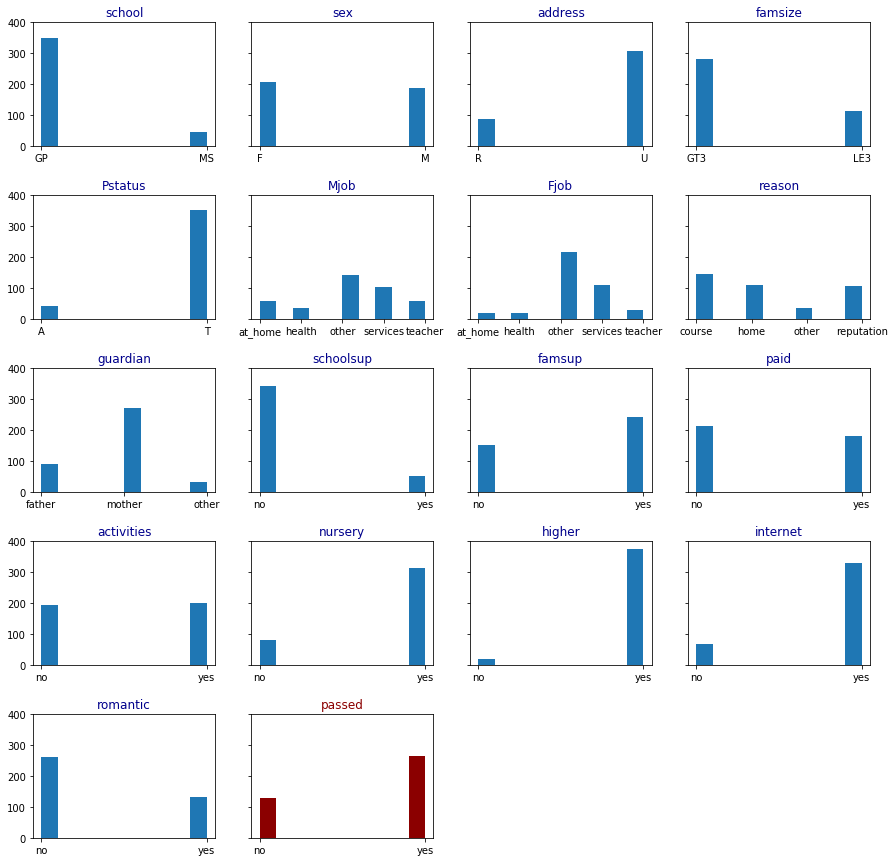

In [8]:
# Plotting histograms of non-numeric data

# Importing the necessary tools from matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Creating a 5x4 subplot matrix, to plot data from the 18 non-numeric columns
fig, axes = plt.subplots(5, 4, figsize=(15, 15), sharey=True)
fig.subplots_adjust(hspace=0.4)
fig.delaxes(axes[4, 2]), fig.delaxes(axes[4, 3])

# Creating a loop to plot data from the non-numeric features (17 columns)
n = 0
for feature in non_numeric[:-1]:
    axes[n/4, np.mod(n, 4)].hist(student_data[feature])
    axes[n/4, np.mod(n, 4)].set_title(feature, color='darkblue')
    axes[n/4, np.mod(n, 4)].set_ylim([0, 400])
    n += 1
    
# Plotting data from the non-numeric label (1 column: 'passed')
axes[4, 1].hist(student_data['passed'], color='darkred')
axes[4, 1].set_title('passed', color='darkred')
axes[4, 1].set_ylim([0, 400])

print 'Histograms of non-numeric data:'

In [9]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = np.sum(student_data['passed'] == 'yes')

# TODO: Calculate failing students
n_failed = np.sum(student_data['passed'] == 'no')

# TODO: Calculate graduation rate
grad_rate = (float(n_passed) / float(n_students)) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [10]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [11]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [12]:
# Checking out the new features
X_all.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


In [13]:
# Confirming they are all numerical - int8 or int64
X_all.dtypes.unique()

array([dtype('uint8'), dtype('int64')], dtype=object)

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [14]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=1)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

<font color=darkblue>
**Answer:**
<br><br>**Decision trees:**
<br><u>Real-world application</u>: I can give a personal example of an application of decision trees in the aviation industry. Working as operations planning analyst at GRU Airport, I needed to develop an aircraft stand allocation simulation model. There were a lot of groups of rules to be considered, such as:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- *Geometric rules* (max aircraft size per stand; adjacencies restrictions);<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- *Type of flight* (the available contact gates depends on whether the flight is domestic or international);<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- *Towing rules* (the simulator needs to be able to decide whether or not the aircraft turnaround will be broke by tows)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- *Business rules* (to consider the preferable allocations of the airlines)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- *Efficiency rules* (to emulate the expertise of the human allocators)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- *Boundary rules* (as the simulator considers just one day, boundary rules are necessary)<br><br>
Among all of them, the towing rules were the most difficult to model. The insights provided by the allocation personnel weren't enough. The simulator needed to be able to look to a turnaround (paired movement: arrival + departure, performed by the same aircraft) and tell if it:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1- won't be towed<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2- will perform a single tow, from stand A to stand B<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3- will perform a multiple tow, from stand A to B, and from B to C.<br><br>
I developed a decision tree model to perform this classification, extracted the rules from it and inserted them as inputs in the simulator. So this machine learning model was one of the pieces of a broader simulation model that was then presented at ANAC and is a benchmark in our sector.
<br><br><u>Strengths</u>: Trees are easy to understand and to visualize. Their outputs are rule-based, thus they can be translated into if-then-else rules and be incorporated in a broader range of softwares (as the airport simulator mentioned above). Other advantages, as listed in the scikit-learn documentation, are: little data preparation requirement; ability to handle both numerical and categorical data.
<br><br><u>Weaknesses</u>: They can create over-complex trees, thus causing overfitting and they also create biased trees if some classes dominate.
<br><br>Decision trees are usually good candidates due to their simplicity and easiness to interpret. Even if their results aren't the best, good information can be extracted from the model, like an estimate of the relative importance of each feature.


<br><br>**Support Vector Machines:**
<br><u>Real-world application</u>: As described by the website *Data Science Central*, SVMs can be applied to face detection, text and hypertext categorization, classification of images, bioinformatics (protein and cancer classification) and handwriting recognition.
<br><br><u>Strengths</u>: One of the main strengths of SVMs, as mentioned in the Udacity's classes, is their ability to use different kernel functions in order to run the algorithm in other domains, in which the data can be more easily separable. SVMs work with the concept of margin (they don't only look for lines that separate the data, but for the ones that do so with the biggest margins), so they are less prone to overfitting when comparing to other linear models. Another advantage, as listed by Kotu and Deshpande (2014), is the fact that, once an SVM model is built, small changes to the training data will not result in significant changes to the model coefficients as long as the support vectors do not change.
<br><br><u>Weaknesses</u>: As stated by Géron (2017), the training complexity is usually between O(n²) and O(n³). So it can get very slow when the number of training instances gets large. As mentioned by Kelleher and Namee (2015), they are not very interpretable, and, especially when kernel functions are used, it is very difficult to understand why a particular prediction has been made.
<br><br>This model is a good candidate because, as described in the scikit-learn documentation, it is still effective in cases where the number of dimensions is large when compared with the number of samples, which is the case in this study.


<br><br>**Ensemble Method - AdaBoost:**
<br><u>Real-world application</u>: The website *Medium* lists as real use cases of ensemble learning algorithms: reccomendation and marketing personalization engines as well as fraud detection systems.
<br><br><u>Strengths</u>: As described by Géron (2017), in general, ensemble modeling reduces the generalization error that arises due to overfitting the training set. This is possible, as explained in the scikit-learning documentation, because several weak learners (less prone to overfitting) are combined to produce a powerful ensemble.
<br><br><u>Weaknesses</u>: The weak learner needs to be chosen carefully. If the weak learner itself is over-complex, the ensemble method may not avoid overfitting.
<br><br>This model is a good candidate because it tends to boost the results of base learners. In its default configuration, AdaBoost's base estimator is the DecisionTreeClassifier. So as we have chosen decision trees as one of our candidate models, it may be a good idea to take AdaBoost too and compare them.

<br><br>**References:**

<br>Books:
<br>Kelleher, John; Namee, Brian. Fundamentals of Machine Learning for Predictive Data Analytics. MIT Press, 2015.
<br>Kotu, Vijay; Deshpande, Bala. Predictive Analytics and Data Mining. Morgan Kaufmann, 2014.
<br>Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. O'Reilly, 2017.

<br><br>Websites:
<br>https://www.datasciencecentral.com/profiles/blogs/real-life-applications-of-support-vector-machines
<br>https://medium.com/@ailabs/5-machine-learning-algorithms-and-their-proper-use-cases-a8cfd0cedb51


<br><br>Other:
<br>Scikit-learn documentation and Udacity's classes.

</font>

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [15]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=1)
clf_B = SVC(random_state=1)
clf_C = AdaBoostClassifier(random_state=1)

# TODO: Set up the training set sizes
X_train_100 = X_train.sample(n=100, random_state=1)
y_train_100 = y_train.sample(n=100, random_state=1)

X_train_200 = X_train.sample(n=200, random_state=1)
y_train_200 = y_train.sample(n=200, random_state=1)

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

In [17]:
# Classifier 1
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test); print '\n'
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test); print '\n'
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test); print '\n'

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7231.


Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0030 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6719.


Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0040 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6984.




In [18]:
# Classifier 2
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test); print '\n'
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test); print '\n'
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test); print '\n'

Training a SVC using a training set size of 100. . .
Trained model in 0.0270 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8553.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8354.


Training a SVC using a training set size of 200. . .
Trained model in 0.0040 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8660.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.8408.


Training a SVC using a training set size of 300. . .
Trained model in 0.0450 seconds
Made predictions in 0.0060 seconds.
F1 score for training set: 0.8584.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.8462.




In [19]:
# Classifier 3
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test); print '\n'
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test); print '\n'
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test); print '\n'

Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.0980 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9855.
Made predictions in 0.0100 seconds.
F1 score for test set: 0.6612.


Training a AdaBoostClassifier using a training set size of 200. . .
Trained model in 0.0800 seconds
Made predictions in 0.0100 seconds.
F1 score for training set: 0.9135.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7188.


Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.1020 seconds
Made predictions in 0.0070 seconds.
F1 score for training set: 0.8578.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.8116.




In order to get the estimates of processing times in a more robust way, it was applied the **%timeit magic command**:

In [111]:
print 'Training times from Classifier 1 (training set sizes of 100, 200 and 300)'
%timeit clf_A.fit(X_train_100, y_train_100)
%timeit clf_A.fit(X_train_200, y_train_200)
%timeit clf_A.fit(X_train_300, y_train_300)

print '\nTraining times from Classifier 2 (training set sizes of 100, 200 and 300)'
%timeit clf_B.fit(X_train_100, y_train_100)
%timeit clf_B.fit(X_train_200, y_train_200)
%timeit clf_B.fit(X_train_300, y_train_300)

print '\nTraining times from Classifier 3 (training set sizes of 100, 200 and 300)'
%timeit clf_C.fit(X_train_100, y_train_100)
%timeit clf_C.fit(X_train_200, y_train_200)
%timeit clf_C.fit(X_train_300, y_train_300)

Training times from Classifier 1 (training set sizes of 100, 200 and 300)
1000 loops, best of 3: 616 µs per loop
1000 loops, best of 3: 1.16 ms per loop
1000 loops, best of 3: 1.83 ms per loop

Training times from Classifier 2 (training set sizes of 100, 200 and 300)
1000 loops, best of 3: 1.05 ms per loop
100 loops, best of 3: 3.16 ms per loop
100 loops, best of 3: 6 ms per loop

Training times from Classifier 3 (training set sizes of 100, 200 and 300)
10 loops, best of 3: 76.5 ms per loop
10 loops, best of 3: 79.6 ms per loop
10 loops, best of 3: 84.4 ms per loop


In [112]:
print 'Prediction times (test) from Classifier 1 (training set sizes of 100, 200 and 300)'
clf_A.fit(X_train_100, y_train_100)
%timeit clf_A.predict(X_test)
clf_A.fit(X_train_200, y_train_200)
%timeit clf_A.predict(X_test)
clf_A.fit(X_train_300, y_train_300)
%timeit clf_A.predict(X_test)

print '\nPrediction times (test) from Classifier 2 (training set sizes of 100, 200 and 300)'
clf_B.fit(X_train_100, y_train_100)
%timeit clf_B.predict(X_test)
clf_B.fit(X_train_200, y_train_200)
%timeit clf_B.predict(X_test)
clf_B.fit(X_train_300, y_train_300)
%timeit clf_B.predict(X_test)

print '\nPrediction times (test) from Classifier 3 (training set sizes of 100, 200 and 300)'
clf_C.fit(X_train_100, y_train_100)
%timeit clf_C.predict(X_test)
clf_C.fit(X_train_200, y_train_200)
%timeit clf_C.predict(X_test)
clf_C.fit(X_train_300, y_train_300)
%timeit clf_C.predict(X_test)

Prediction times (test) from Classifier 1 (training set sizes of 100, 200 and 300)
10000 loops, best of 3: 128 µs per loop
10000 loops, best of 3: 117 µs per loop
10000 loops, best of 3: 117 µs per loop

Prediction times (test) from Classifier 2 (training set sizes of 100, 200 and 300)
1000 loops, best of 3: 638 µs per loop
1000 loops, best of 3: 1.1 ms per loop
1000 loops, best of 3: 1.5 ms per loop

Prediction times (test) from Classifier 3 (training set sizes of 100, 200 and 300)
100 loops, best of 3: 4.17 ms per loop
100 loops, best of 3: 4.19 ms per loop
100 loops, best of 3: 4.16 ms per loop


### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Trees**  

| Training Set Size | Training Time (s) | Prediction Time (test) (s) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.000616        |         0.000128       |      1.0000      |     0.7231      |
| 200               |         0.001160        |         0.000117       |      1.0000      |     0.6719      |
| 300               |         0.001830        |         0.000117       |      1.0000      |     0.6984      |

** Classifer 2 - Support Vector Machines**  

| Training Set Size | Training Time (s) | Prediction Time (test) (s) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.001050        |         0.000638       |      0.8553      |     0.8354      |
| 200               |         0.003160        |         0.001100       |      0.8660      |     0.8408      |
| 300               |         0.006000        |         0.001500       |      0.8584      |     0.8462      |

** Classifer 3 - Ensemble Method: AdaBoost**  

| Training Set Size | Training Time (s) | Prediction Time (test) (s) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.076500        |         0.004170       |      0.9855      |     0.6612      |
| 200               |         0.079600        |         0.004190       |      0.9135      |     0.7188      |
| 300               |         0.084400        |         0.004160       |      0.8578      |     0.8116      |

Learning Curves:


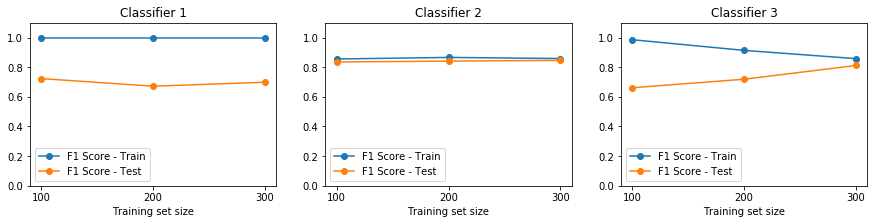

In [86]:
# Analysing the Learning Curves
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
f1_train_clf = pd.DataFrame([[1., 1., 1.], [0.8553, 0.8660, 0.8584], [0.9855, 0.9135, 0.8578]],
                            index=['clf_A', 'clf_B', 'clf_C'], columns=[100, 200, 300])
    
f1_test_clf = pd.DataFrame([[0.7231, 0.6719, 0.6984], [0.8354, 0.8408, 0.8462], [0.6612, 0.7188, 0.8116]],
                            index=['clf_A', 'clf_B', 'clf_C'], columns=[100, 200, 300])

for n in range(3):
    axes[n].plot(f1_train_clf.iloc[n], 'o-', label='F1 Score - Train')
    axes[n].plot(f1_test_clf.iloc[n], 'o-', label='F1 Score - Test')
    axes[n].set_ylim([0., 1.1])
    axes[n].set_xticks([100, 200, 300])
    axes[n].set_title('Classifier '+str(n+1))
    axes[n].set_xlabel('Training set size')
    axes[n].legend(loc='best')
    
print 'Learning Curves:'

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

<font color=darkblue>
**Answer:**<br><br>
The **SVM model was the chosen one**. It has achieved the best performance in terms of f1_score for all the training set sizes. This robustness relatively to the training set size is important if future available training sets are of the same magnitude. This behavior was expected because, as anticipated in question 2, SVM models are still effective in cases where the number of dimensions is large when compared with the number of samples. Even in the case of a training set of 100 samples, the 48-features SVM model has achieved a f1-score of 0.8354.<br><br>
    
In terms of training times, the SVM models presented the higher complexity (a little below quadratic on the sample size). However, in absolute terms, it will only be an issue if future training sets are much larger than the one used in this study. In this context, with more than 10.000 samples, the process starts to be slow if you consider cross validation tuning with a large grid of parameters/values.<br><br>

A weakness of the SVM model is that it is not very interpretable. Although you can identify the students that might need early intervention, you may not have valuable information about the causes of the imminent failures. The knowledge of the causes can be a good driver to establish better approaches o these early interventions (when and how to apply them). That's why we have also used decision tree's models. In the following cell we present the 3 most relevant features in order to segregate the ones that probably will pass and the ones that probably won't.
</font>

In [121]:
# The 3 most important features according to the decision tree's model
feature_ranking = pd.DataFrame({'importance': list(clf_A.feature_importances_), 'feature': list(X_train.columns)})
feature_ranking.set_index('feature', inplace=True)
feature_ranking.sort_values('importance', ascending=False)[:3]

,importance
feature,
absences,0.128598
failures,0.087692
freetime,0.061823


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

<font color=darkblue>
**Answer:**<br>
SVMs work on the principle of fitting boundaries to regions of points that are all alike (that is, belong to the same class). In our case, we have two classes: students that will pass and the ones that won't. The learning algorithm won't just look for lines that separate the data, but for the ones that do so with the biggest margins of safety. This characteristic is useful to increase the model's ability to keep good performances when it is tested with different datasets.
<br><br>
After the boundaries are set, predictions can be made just analysing in which region a new data point is located. If the features of a student constitutes a data point that falls in a region labeled by the model as one where students will pass, the model will predict that this student will do so.
<br><br>
Just to explain the name of this class of models, but not bothering will technical details, SVMs just use a core set of points do identify the boundaries. These data points are called support vectors because each one of them is a "vector" that "support" the boundary. This explains another strength of the model: small changes to the training data will not result in significant changes to the model coefficients as long as the support vectors do not change. This means the model tends to be more robust.
</font>

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [21]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'C': [0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
              'gamma': ['auto', 0.05, 0.10, 0.15, 0.20]}

# TODO: Initialize the classifier
clf = SVC(random_state=1)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0100 seconds.
Tuned model has a training F1 score of 0.9754.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8481.


In [122]:
# Taking a look at the final parameters after the tuning
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

<font color=darkblue>
**Answer:**<br><br>
The final model's f1 score for training is **0.9754** and for testing is **0.8481**.<br>
The final testing score is a little higher than the untuned model (that was 0.8462).<br><br>
Three parameters were tested: **C**, **gamma** and the **kernel**.<br>
The final model kept the default values for C and the kernel (*C=1* and *kernel=rbf*), but **changed the gamma value from 1/300 (default value) to 0.1**. The higher value for the gamma parameter means that each training point has a smaller area of influence when defining the boundary lines. This means that the points closer to the boundary have more relevance and can make it become more sinuous. **This can lead to overfitting and, judging by the large gap formed between training scores and test ones, that's what actually happened in our case**.<br><br>

**I prefer to use the untuned model, with the default value of gamma**, that has almost the same performance with a total error more relative to the hypothesis set bias instead of its variance. This means that it has a higher probability to generalize well in future datasets, in other words, a higher probability to keep similiar good performances.
</font>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.